# Data Mining - Assignment #2 - Clustering
### Problem C: Use the Silhouette Coefficient to find the best number of clusters k for the data set.
i.e. run the k-mean algorithm for k = 1, 2,….,40 and calculate the Silhouette Coefficient. Generate a graph where you plot the Silhouette Coefficient as a function of the number of cluster k=1...40.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import silhouette_score

### Load and merge Mnist test and train datasets:

In [6]:
mnist_test = pd.read_csv(r"mnist_test.csv", sep=",")
mnist_train = pd.read_csv(r"mnist_train.csv", sep=",")
mnist = pd.concat([mnist_train, mnist_test], ignore_index=True)
mnist.sample(20)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
61322,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44549,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65036,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26270,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7120,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44376,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11997,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36705,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load KMean Functions that implemented in the previous steps (A & B):

In [7]:
from kmean import Cosine_IterativeKMean, Euclidean_IterativeKMean

Convert the dataframe to arrays that the k-mean function accepts

In [8]:
def sample(features, outputs, sample_size):
    rng = np.random.default_rng()    
    indices = rng.choice(len(outputs), size=sample_size, replace=False)    
    return features[indices], outputs[indices]

# Create the labels array (y) by selecting only the label column
true_labels = mnist['label'].to_numpy()
# Create the features array (X) by dropping the label column
features = mnist.drop(columns=['label'], axis=1).to_numpy()
features, true_labels = sample(features, true_labels, 5000)

### 1- When Euclidean distance is used as the distance measure for clustering

In [ ]:
cof=[]
max_k = 40
for k in range(1,max_k+1):
    print('-')
    max_iter=20
    results = Euclidean_IterativeKMean(features, true_labels, k=k, max_iter=max_iter, include_cost=False, include_accuracy=False, include_silhouette=True)
    cof.append(results["silhouette"])
cof

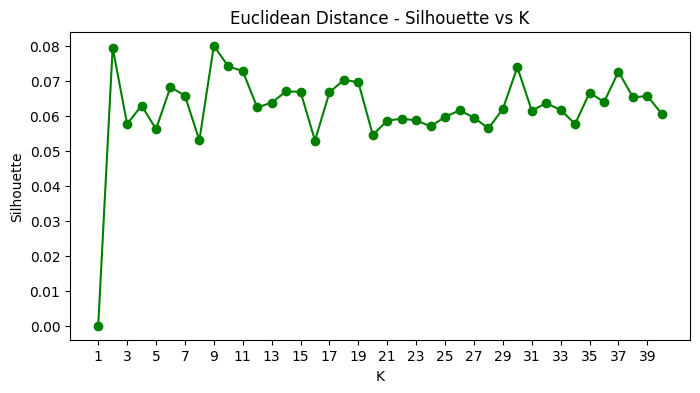

In [11]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof)[:,-1], 'g-o')
plt.title("Euclidean Distance - Silhouette vs K")
plt.ylabel("Silhouette")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()


### 2- When Cosine Similarity is used as the distance measure for clustering

In [ ]:
cof2=[]
max_k = 40
for k in range(1, max_k + 1):
    print(k)
    max_iter=20
    results2 = Cosine_IterativeKMean(features, true_labels, k=k, max_iter=max_iter, include_cost=False, include_accuracy=False, include_silhouette=True)
    cof2.append(results2["silhouette"])
cof2

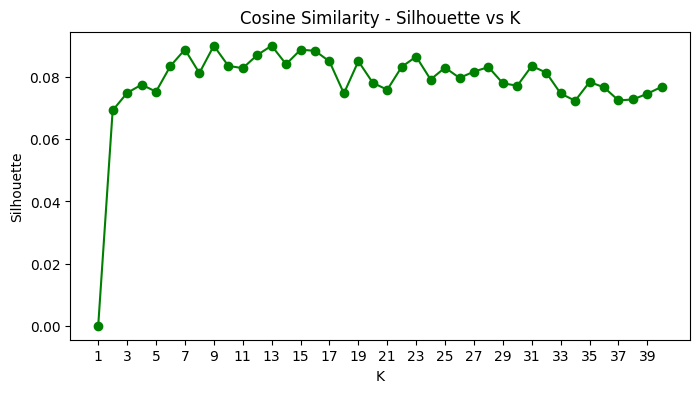

In [14]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof2)[:,-1], 'g-o')
plt.title("Cosine Similarity - Silhouette vs K")
plt.ylabel("Silhouette")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()
